In [1]:
bulk=t(read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk.csv',
              sep=',',header=TRUE,row.names=1))
head(bulk)

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZC3H4,ZCCHC8,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703
A83V,-2.235165e-02,0.041825347,0.11649662,-0.011053114,0.01556775,0.11453190,0.06085642,0.07982668,-0.05231992,0.12946987,...,-0.071344927,-0.074995585,-0.009635145,0.075242519,0.097680338,0.15127619,-0.013517891,-0.001542934,0.06774227,5.015345e-02
D21D,2.709719e-02,-0.054916173,0.10349488,0.050584417,0.08361228,0.19255257,0.04186647,0.02284725,0.01401765,0.08700153,...,-0.007084109,-0.029003290,-0.020205086,0.109717652,0.023588477,0.04653666,-0.007020437,-0.070680261,0.01410923,4.028393e-02
E2E,1.534340e-02,-0.038135894,0.06340600,0.019333428,-0.03366649,0.13525869,0.13752320,0.04145280,-0.03209441,0.09962401,...,-0.017169971,0.005704965,-0.030621570,0.132208079,0.050013859,0.12995481,0.020511582,-0.125791669,0.03127446,7.295596e-02
E339K,3.240337e-05,-0.100818194,0.06517444,0.007318148,0.03310967,0.07217761,0.03460255,0.12101696,-0.09902704,0.08773739,...,-0.026376188,-0.028744359,0.022923989,0.085291274,0.012167432,0.15226689,0.058443576,-0.034465797,0.01243877,9.161092e-02
G360V,2.287487e-02,0.052955408,0.05986758,0.008931487,0.00609383,0.11721204,0.09829420,0.03143420,-0.01376072,0.08936287,...,-0.066470452,-0.058120094,0.044944137,-0.015094060,0.007714464,0.03609169,0.013155499,-0.029843124,0.02077683,2.082225e-02
L344L,2.726310e-02,-0.005816333,0.09761339,0.026624201,0.03082921,0.11338551,0.10409842,0.05840592,-0.04648657,0.12965974,...,-0.018226536,-0.043783225,-0.002342346,-0.003712153,0.046935111,0.04703856,0.007629029,-0.020705784,-0.02479392,6.397231e-05


In [2]:
length(rownames(bulk))

[1] 100

In [3]:
rownames(bulk)

[1] "A83V"       "D21D"       "E2E"        "E339K"      "G360V"     
  [6] "L344L"      "P153P"      "P222P"      "P295P"      "P301P"     
 [11] "P359P"      "P36P"       "P47P"       "P47S"       "P58R"      
 [16] "Q5R"        "R158R"      "R337C"      "S366A"      "T118T"     
 [21] "T170T"      "T312S"      "V216V"      "V31I"       "WT"        
 [26] "Y107H"      "A159V"      "C277F"      "E271K"      "G105C"     
 [31] "G154V"      "M246V"      "P152L"      "P250L"      "R110L"     
 [36] "R158H"      "R213Q"      "R248L"      "R248W"      "R273C"     
 [41] "R273H"      "R273L"      "R280K"      "R280T"      "R337L"     
 [46] "S241C"      "S241F"      "V272L"      "unassigned" "A159P"     
 [51] "C135Y"      "C238F"      "C238Y"      "C242F"      "E285K"     
 [56] "E286K"      "G244C"      "G245C"      "G266E"      "G266V"     
 [61] "H179R"      "H193Y"      "K132N"      "K132R"      "M237I"     
 [66] "P278L"      "R158L"      "S127F"      "V173L"      "V216M"     
 [71] "Y163C"      "Y205C"      "Y220C"      "Y234C"      "Y236C"     
 [76] "C135F"      "C141Y"      "C176F"      "C176Y"      "C275F"     
 [81] "C275Y"      "G245D"      "G245S"      "G245V"      "G266R"     
 [86] "H179Y"      "H193L"      "H193R"      "H214R"      "I195T"     
 [91] "L194R"      "P151S"      "P278S"      "R175H"      "R249M"     
 [96] "R249S"      "R282W"      "V157F"      "V173M"      "V272M"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/TP53.scores_vs_P359P.csv',
                 sep=',',header=TRUE,row.names=1)
print(dim(scores_init))
rownames(scores_init)=scores_init[,'group2']
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2'])))
rownames(scores)=scores_init[,'group2']
colnames(scores)='score'
head(scores)

[1] 100  11


,score
,<dbl>
A83V,30.99566
D21D,20.95066
E2E,28.06565
E339K,38.22667
G360V,24.50642
L344L,32.17323


In [5]:
scores['P36P',]

[1] 23.19526

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

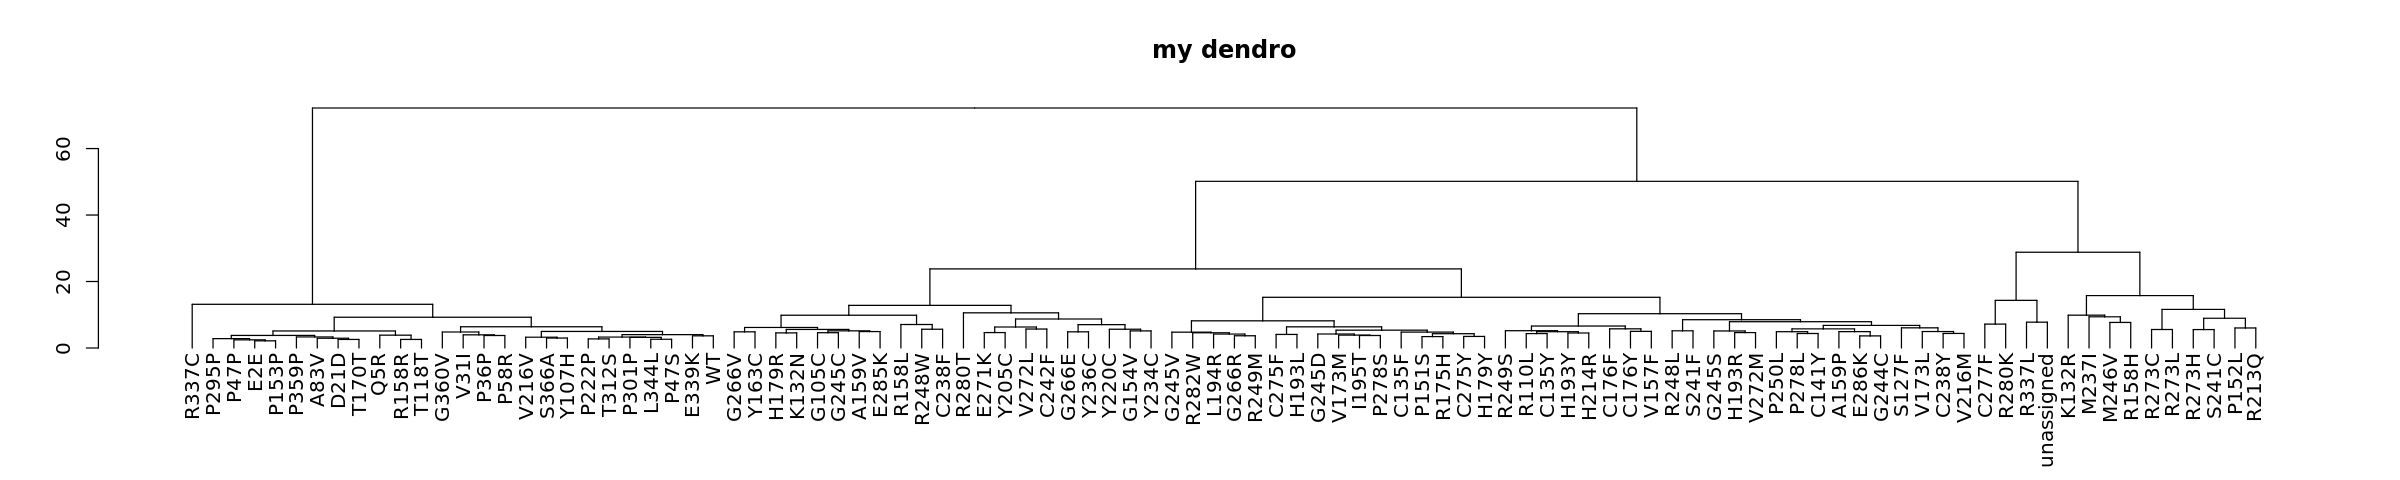

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

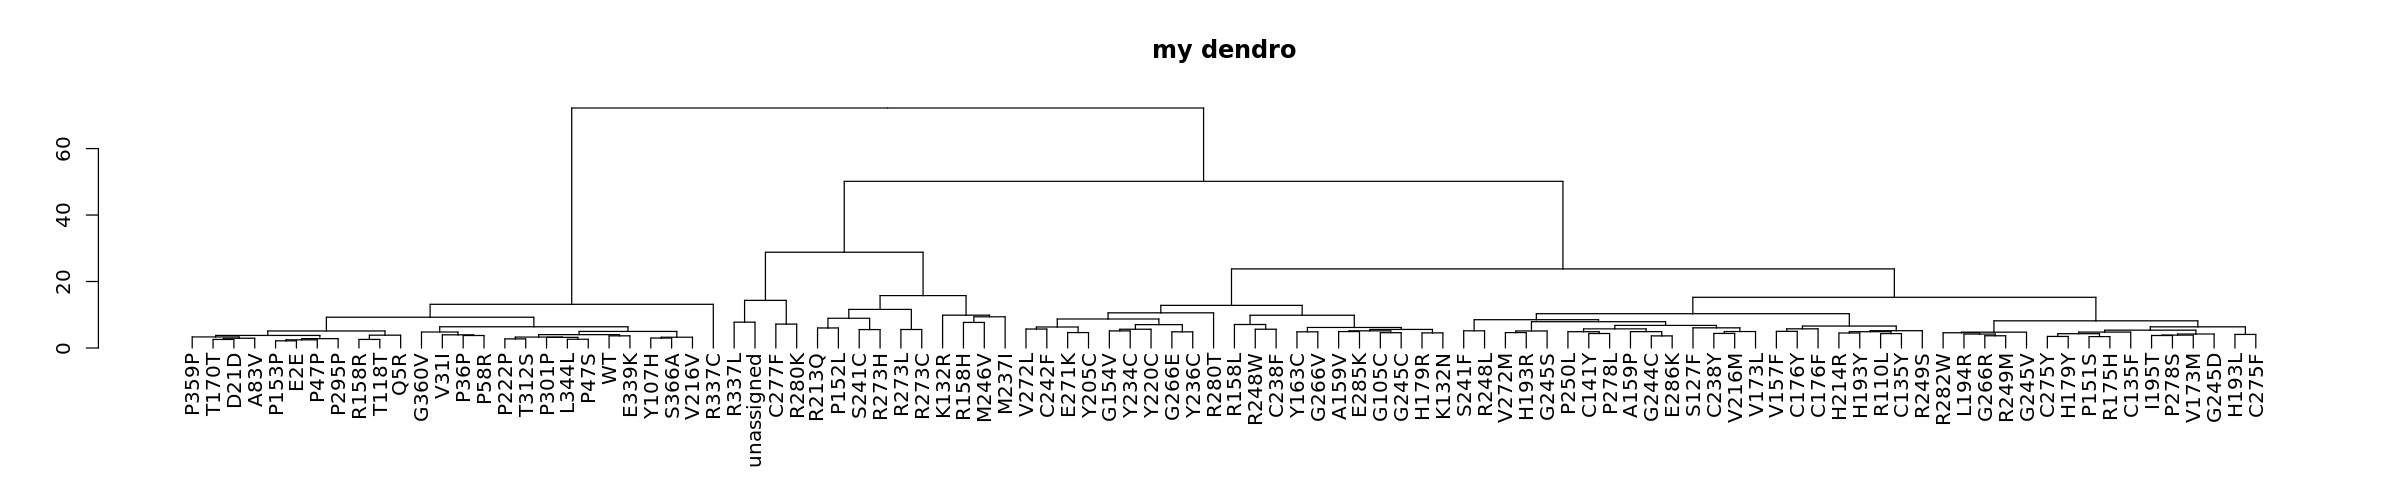

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend

Warning message:
"replacing previous import 'mclust::dmvnorm' by 'mvtnorm::dmvnorm' when loading 'fpc'"

---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

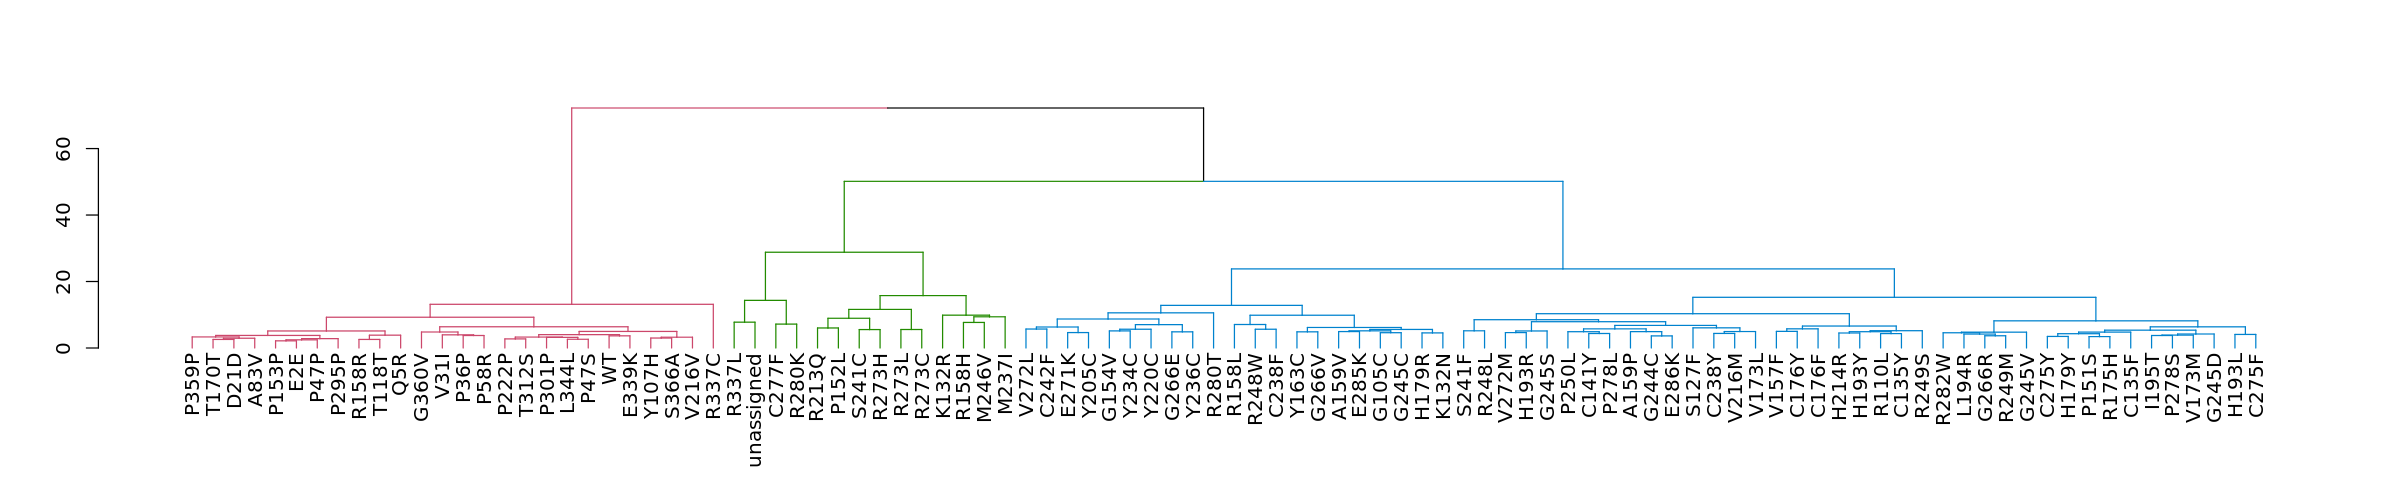

In [13]:
plot(dend,col=c('black','lightblue','blue'))

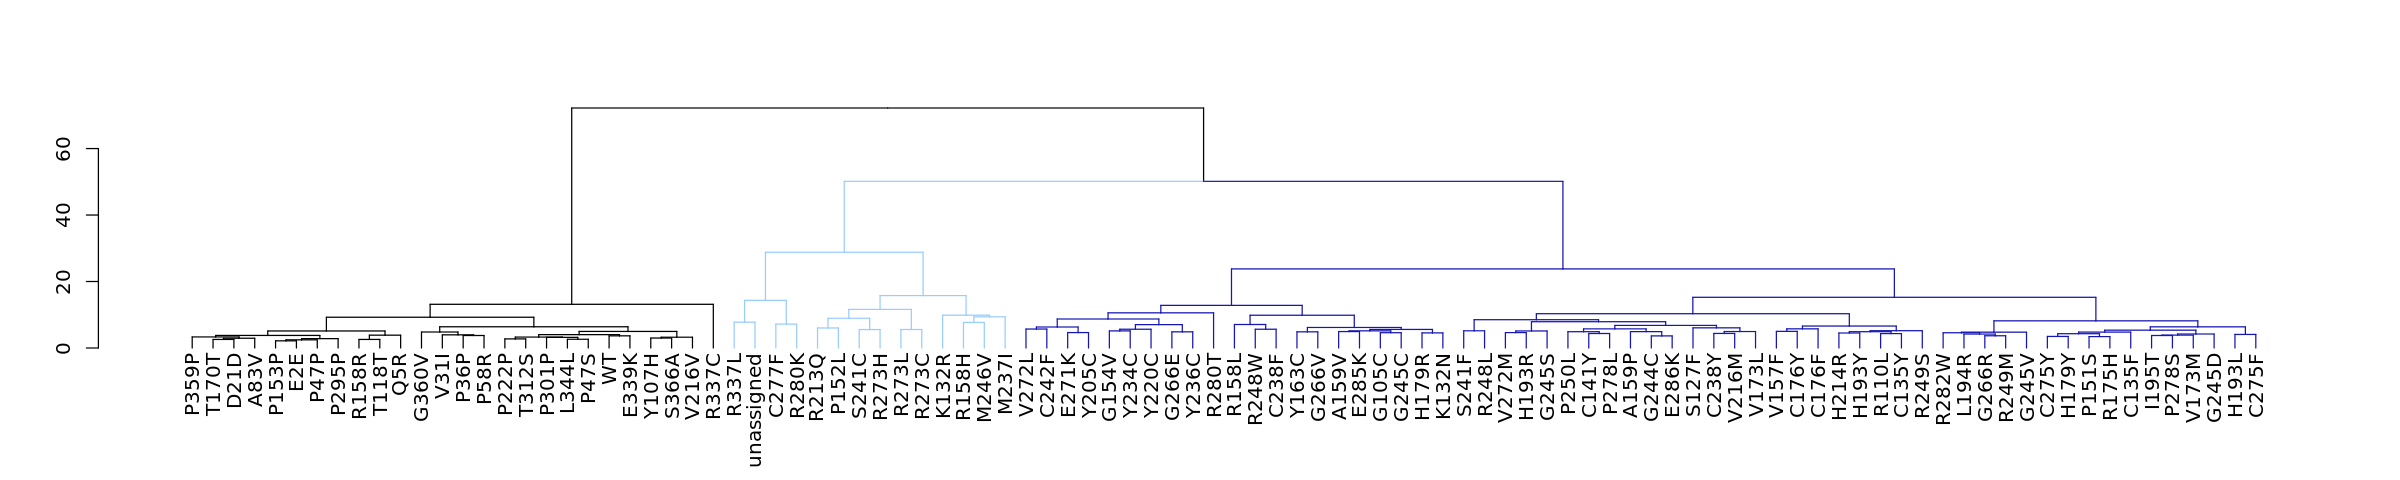

In [20]:
options(repr.plot.width=20, repr.plot.height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
plot(d1)

In [21]:
options(repr.plot.width=20, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53'
pdf(paste(f_pref,'.dendrogram.pdf',sep=''),width=20,height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.pdf',sep=''))

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53.dendrogram.pdf"


In [22]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [23]:
dev.off()
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53'
png(paste(f_pref,'.dendrogram.png',sep=''),width=1,height=1)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','navy'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.png',sep=''))

null device 
          1

ERROR: Error in plot.new(): figure margins too large


In [24]:
png()
dev.off()

png 
  2

In [25]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [26]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.corrL1.sorted_variants.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)